# Staff-Graded Network Models

### Part (a)

[110  27  63]


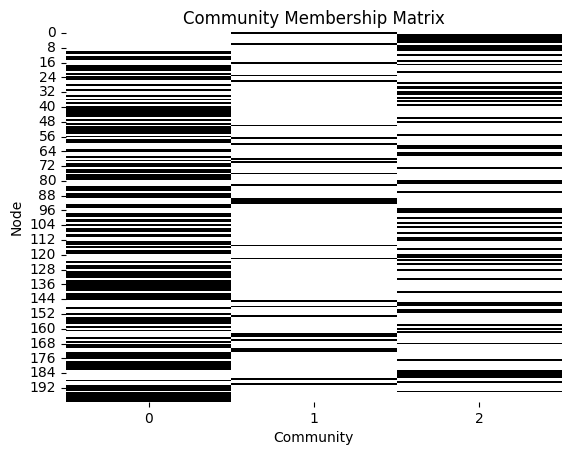

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx


pi = [0.5, 0.15, 0.35]  # NOTE: This is a trinomial distrib, as there are 3 clusters
B = np.array([[0.9, 0.15, 0.25],
                [0.15, 0.75, 0.05],
                [0.25, 0.05, 0.6]])
rho = 1
n = 200
np.random.seed(1)

theta = np.random.multinomial(n=1, pvals=pi, size=(n))
print(block_counts := np.sum(theta, axis=0))

# Create a heatmap using seaborn
sns.heatmap(theta, cmap="binary", cbar=False)

# Add title and labels
plt.title('Community Membership Matrix')
plt.xlabel('Community')
plt.ylabel('Node')
plt.show()


### Part (b)

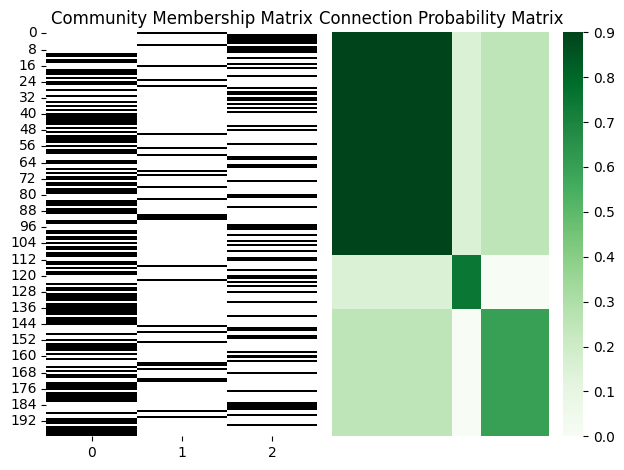

P[1,3]:
0.9

P[197,199]:
0.6

P[192,4]:
0.25



In [3]:
# Initialize blank P
P = np.zeros((n,n))
break1 = block_counts[0]
break2 = break1 + block_counts[1]
break3 = break2 + block_counts[2]

# Fill P
P[0:break1, 0:break1] = B[0,0]
P[break1:break2, 0:break1] = B[0,1]
P[0:break1, break1:break2] = B[0,1]
P[break2:break3, 0:break1] = B[0,2]
P[0:break1, break2:break3] = B[0,2]
P[break1:break2, break1:break2] = B[1,1]
P[break2:break3, break2:break3] = B[2,2]

# Create subplots and plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, this is the first plot
sns.heatmap(theta, cmap="binary", cbar=False)
plt.title('Community Membership Matrix')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, this is the second plot
sns.heatmap(P, cmap='Greens', xticklabels=False, yticklabels=False)
plt.title('Connection Probability Matrix')

plt.tight_layout()
plt.show()

# Show requested indeces of P
print(f'P[1,3]:\n{P[1,3]}\n')
print(f'P[197,199]:\n{P[197,199]}\n')
print(f'P[192,4]:\n{P[192,4]}\n')

### Part (c)

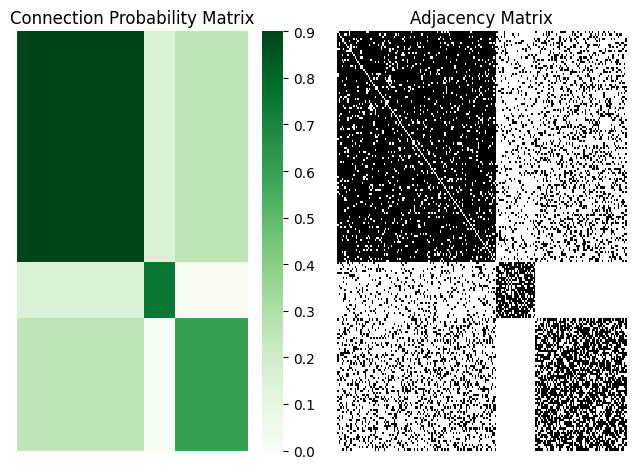

In [4]:
# Fill R using bernoulli with probabilities from P
R = np.zeros((P.shape[0],P.shape[1]))
for i in range(P.shape[0]):
    for j in range(P.shape[1]):
        R[i,j] = np.random.binomial(n=1, p=P[i,j])
    R[i,i] = 0

# Make A out of symmetrical upper triangles of R
R1 = np.triu(R)
A = R1 + R1.T

# Create subplots and plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, this is the second plot
sns.heatmap(P, cmap='Greens', xticklabels=False, yticklabels=False)
plt.title('Connection Probability Matrix')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, this is the second plot
sns.heatmap(A, cmap='Greys', xticklabels=False, yticklabels=False, cbar=False)
plt.title('Adjacency Matrix')

plt.tight_layout()
plt.show()

### Part (d)

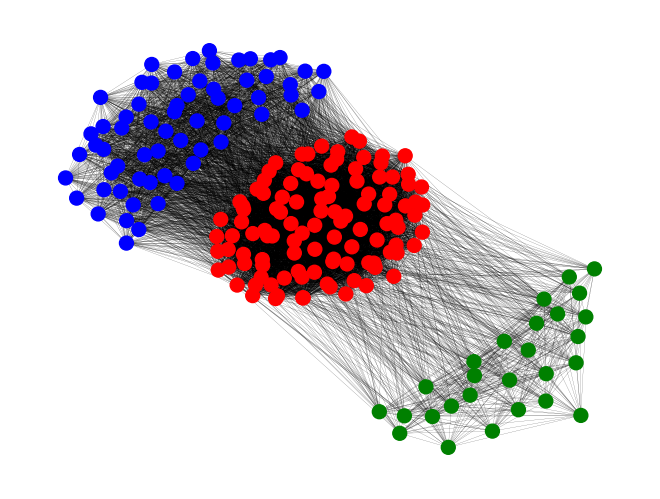

In [25]:
# Create a graph from the adjacency matrix
G = nx.from_numpy_array(A)

# Create a list of colors based on the community membership
cmap = []
for node in G:
    if node < 110:
        cmap.append('red')
    elif node < (110+27):
        cmap.append('green')
    else:
        cmap.append('blue')

# Set the position of the nodes
pos = nx.spring_layout(G)



# Draw the nodes with different colors for each community
nx.draw(G, pos, with_labels=False, node_size=100, width=0.1, node_color=cmap, cmap='tab10')

# Show the plot
plt.show()
